# Señales discretas importantes

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Señales relevantes para el análisis y procesamiento de sistemas

Algunas [señales](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) discretas juegan un rol muy importante en la teoría y aplicaciones prácticas. Veremos a continuación las más relevantes.


***
### Sinusoides discretas

Uno de los clásicos ejemplos de una señal discreta es una sinusoide. Sin embargo, a diferencia de su [contraparte continua](./03-Funciones_importantes.ipynb#sinusoides), no todas la sinusoides discretas son periódicas.

La sinusoide discreta se describe por

$$ x[n] = A\cos[\omega n + \phi] $$ 

si se utiliza una variable de frecuencia $\omega$ en radianes. $A$ es la amplitud y $\phi$ la fase. En cambio si se prefiere una frecuencia $u$ en Hertz, entonces

$$ x[n] = A\cos[2\pi u n + \phi] $$

Sabemos que la sinusoides son periódicas en $2\pi$, es decir:

$$ A\cos[\omega n + \phi] = A\cos[\omega n + 2\pi k + \phi] $$

donde $k \in \mathbb{Z}$. 

#### Periocididad en las muestras

Supongamos que una sinusoide discreta es períodica de periódo $N$, con $N \in \mathbb{Z}$, es decir se repite exactamente cada $N$ muestras. Entonces, se debe cumplir que:

$$ A\cos[\omega (n+N) + \phi] = A\cos[\omega n + 2\pi k + \phi] $$

$$ A\cos[\omega n + \omega N + \phi] = A\cos[\omega n + 2\pi k + \phi] $$

lo que implica que 

$$ \omega N  = 2 \pi k $$

o bien

$$ \omega = 2 \pi \frac{k}{N} $$

Es decir, la frecuencia angular en radianes tiene que ser un múltiplo racional de $\pi$. $\frac{k}{N}$ debe ser un número racional, dado que $k,n \in \mathbb{Z}$

Esto implica que una sinusoide es periódica en las muestras sólo para ciertos valores de la frecuencia $\omega$, aquellos que son múltiplos racionales de $\pi$. 

#### Periodicidad en la frecuencia

Supongamos ahora que evaluamos una sinusoide discreta en una frecuencia $\omega + 2 \pi k$, con $k \in \mathbb{Z}$. Entonces,

$$ A\cos[(\omega + 2 \pi k) n + \phi] = A\cos[\omega n + 2 \pi k n + \phi] $$

Dado que $ k n 2\pi $ es siempre un múltiplo entero de $ 2 \pi $, entonces 

$$ A\cos[\omega n + 2 \pi k n + \phi] = A\cos[\omega n + \phi] $$

lo que implica que una sinusoide discreta también es periódica en frecuencia, con período $2 \pi $.

El resultado anterior es evidente si se considera que una sinusoide discreta es una versión muestreada de una sinusoide continua. Como está muestreada, necesariamente su espectro de frecuencias es periódico. Por lo tanto, una sinusoide discreta es periódica en frecuencia.

#### Tasa de oscilación de una sinusoide discreta
El resultado anterior implica que una sinusoide discreta incrementará su tasa de oscilación a medida que $\omega$ aumenta a partir de cero, pero sólo hasta un cierto límite, cuando $\omega = \pi$. En el intervalo [$\pi,2\pi$], la tasa de oscilación decrece a medida que $\omega$ crece desde $\pi$ a $2\pi$. Desde el punto de vista del muestreo, esto sucede por que las réplicas del espectro que están fuera del rango $[-\pi,\pi]$ se traslapan o alían cuando se traspasa la frecuencia de Nyquist $\omega = \pi$

Este resultado se puede comprobar en el siguiente código:

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(omega):
    n = np.arange(20)
    y = np.cos(omega * np.pi * n) 
    t = "cos[%.1f $\pi$ n]" %(omega)
    plt.title(t)
    plt.stem(n, y,use_line_collection=True)
    plt.xlim(0, 1)
    plt.ylim(-1, 1)    
    plt.xlabel('n')
    plt.xticks([0,20],['$0$','$20$'])
    plt.yticks([-1.2,0,1.2],['$-1.2$','$0$','$1.2$'])
    plt.show()
    
slider_period = widgets.FloatSlider(value=0,min=0,max=2
                                    ,step=0.1)   

interact(plot_func, omega=slider_period)

plt.show()

interactive(children=(FloatSlider(value=0.0, description='omega', max=2.0), Output()), _dom_classes=('widget-i…

***
<a name="exponencial_compleja"></a>
### Exponencial compleja

La señal exponencial compleja 

$$ x[n] = z^{n} $$

se define mediante la [función exponencial compleja](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane) donde $z = e^{\sigma + i \omega}$ denota la frecuencia compleja $z \in \mathbb{C}$ con $\sigma, \omega \in \mathbb{R}$. Esta señal se relaciona con la [señal exponencial compleja continua](./03-Funciones_importantes.ipynb#exponencial_compleja) $x(t) = e^{(\sigma + i \omega) t}$ que ha sido muestrada con un período de muestreo $T$:

\begin{equation}
x[n] = x(n T) = e^{(\sigma + i \omega) n T} = e^{( \sigma T + i \omega T ) n}
\end{equation}

Notamos de las variables de la frecuencia compleja se han transformado en $\sigma T$ y $\omega T$. Al estar multiplicada por el período de muestreo, la frecuencia angular $\omega$ está dividida por la frecuencia de muestreo, por lo que se conoce como *frecuencia normalizada*. Mediante la [formula de Euler](https://en.wikipedia.org/wiki/Euler's_formula), esta definición se puede reformular como:

\begin{equation}
x[n] = e^{\sigma n} \cos[\omega n] + i e^{\sigma k} \sin[\omega n]
\end{equation}

Las partes real a imaginaria de la señal exponencial están dadas por una ponderación de cosenos y senos discretos con frecuencia normalizada $\omega T$. Esta frecuencia normalizada es ambigua dada la periodicidad de las funciones coseno y seno para la variable discreta $k$. Por ejemplo:

\begin{equation}
\cos[\omega T n] = \cos[(\omega T + \kappa \cdot 2 \pi) \cdot n]
\end{equation}

con $ \kappa \in \mathbb{Z}$. Se puede concluir que la frecuencia normalizada $\omega T$ es única para $-\pi < \omega T < \pi$, tal como fue discutido anteriormente para el caso de la sinusoide. La frecuencia normalizada $\omega T = \pm \pi$ representa la frecuencia normalizada más alta que una señal muestreada puede contener.

La función exponencial compleja es periódica solo con respecto al índice discreto $n$, si

\begin{equation}
x[n] = x[n + \kappa \cdot N]
\end{equation}

se cumple para $\kappa \in \mathbb{Z}$ y $N \in \mathbb{N}$. Esta periodicidad de la función exponencial compleja está dada por 

\begin{equation}
N = \frac{2 \pi}{\omega T}
\end{equation}

Se puede deducir entoncer que el requerimiento $N \in \mathbb{N}$ para una secuencia periódica, que no todas las frecuencias normalizadas $\omega T$ resultan en una señal exponencial compleja discreta periódica. Solo $\omega T = \frac{2 \pi}{N}$ con $N \in \mathbb{N}$ es periódica de período $N$. 


El muestreo de una señal exponecial compleja continua puede resultar en una secuencia discreta aperiódica.

La exponencial compleja se puede expresar en término de su magnitud y fase

\begin{equation}
x[n] = z^n = |z|^n \cdot e^{i \varphi(z) n}
\end{equation}

donde $|z| = |e^\sigma T|$ and $\varphi(z) = \omega T$. Esto permite interpretar la frecuencia compleja $z$. Su fase $\varphi(z)$ es igual a la frecuencia normalizada $\omega T$ de su parte armónica $e^{i \omega T n}$. Esto está multiplicado por la magnitud $|z|^n$. A medida que el índice $n >0$ se incrementa, la magnitud de la exponencial compleja es:

* exponencialmente decayente para $|z| < 1$ ($\sigma < 0$)
* constante e igual a 1 para  $|z| = 1$ ($\sigma = 0$)
* exponencialmente creciente para $|z| > 1$ ($\sigma > 0$).

**Ejemplo:**

Este ejemplo ilustra la exponencial compleja y sus parámetros. Primero definimos la señal exponencial compleja. Y mostramos los primeros 10 valores para $\sigma = 0.025$ y $\omega = 0.5$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def exponential_signal(n, sigma, omega):
    return np.exp((sigma + 1j * omega) * n)


def plot_signal(k, x):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.stem(k, np.real(x), use_line_collection=True)
    plt.xlabel('$k$')
    plt.ylabel(r'$\Re \{ x[k] \}$')

    plt.subplot(122)
    plt.stem(k, np.imag(x), use_line_collection=True)
    plt.xlabel('$k$')
    plt.ylabel(r'$\Im \{ x[k] \}$')
    plt.tight_layout()
    
n = np.arange(31)
x = exponential_signal(n, 0.025, 0.5)
x[:10]

array([ 1.        +0.j        ,  0.89979867+0.49156225j,
        0.5680042 +0.88461412j,  0.07624651+1.07518404j,
       -0.45991338+1.00492907j, -0.90781465+0.67815778j,
       -1.15020718+0.16395806j, -1.11555049-0.41786919j,
       -0.79836212-0.92436066j, -0.26398437-1.22418317j])

Ahora graficamos la señal, con su parte real a la izquierda e imaginaria a la derecha.

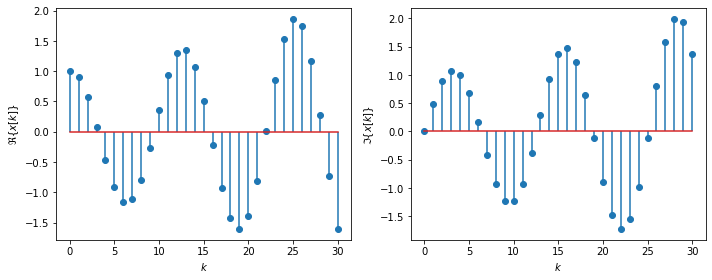

In [12]:
plot_signal(n, x)

Ahora el caso de una exponencial armónica aperiódica con $N \notin \mathbb{N}$ se muestra para $\sigma = 0$. 

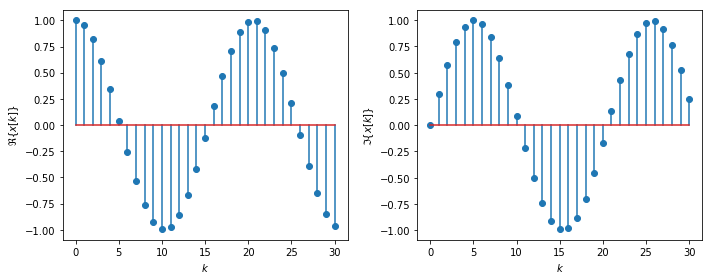

In [6]:
Np = 20.55
x = exponential_signal(n, 0, 2 * np.pi / Np)
plot_signal(n, x)

***
<a name="impulso"></a>
### El Impulso de Dirac discreto

El impulso de Dirac discreto $\delta[n]$ no se puede derivar mediante el muestreo de su [contraparte continua](./03-Funciones_importantes.ipynb#impulso), dado que la [distribución delta de Dirac](https://en.wikipedia.org/wiki/Dirac_delta_function) no es una función en el sentido convencional. El impulso discreto se define como:

\begin{equation}
\delta[n] = \begin{cases}
1 & \text{for } n = 0 \\
0 & \text{otro caso}
\end{cases}
\end{equation}

Esta función también se conoce como el [*delta de Kronecker*](https://en.wikipedia.org/wiki/Kronecker_delta), y la señal como la *secuencia impulso* o el *impulso unitario*. $\delta[n]$ maintiene las propiedades esenciales de su contraparte continua $\delta$. En particular

1. **Propiedad del cedazo**
    \begin{equation}
    \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[n - \kappa] = x[n]
    \end{equation}
    Esta propiedad implica 
    $$\sum_{\kappa = -\infty}^{\infty} \delta[\kappa] = 1$$
    
2. **Multiplicación**
    \begin{equation}
    x[n] \cdot \delta[n - \kappa] = x[\kappa] \cdot \delta[n - \kappa]
    \end{equation}
    
3. **Linearidad**
    \begin{equation}
    a \cdot \delta[n] + b \cdot \delta[n] = (a+b) \cdot \delta[n]
    \end{equation}

El impulso discreto de Dirac es una señal fundamental en la teoría de las señales y sistemas. Se utiliza por ejemplo en la caracterización de los sistemas LTI mediante su respuesta al impulso.

**Ejemplo**

Las propiedades del impulso discreto se muestran a continuación. Primero definimos una función para el impulso y la graficamos:

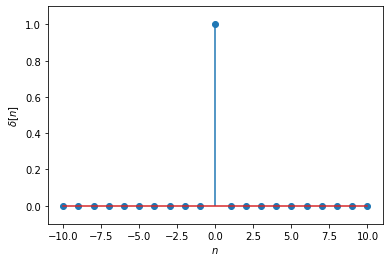

In [4]:
def dirac(n):
    return np.where(n == 0, 1.0, 0.0)


n = np.arange(-10, 11)
x = dirac(n)
plt.stem(n, x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$\delta[n]$')
plt.ylim([-0.1, 1.1])
plt.show()

Veamos ahora la propiedad de la multiplicación definiendo una señal coseno $y[n] = \cos[n]$ y calculando la señal $w[n] = y[n] \cdot \delta[n-6]$

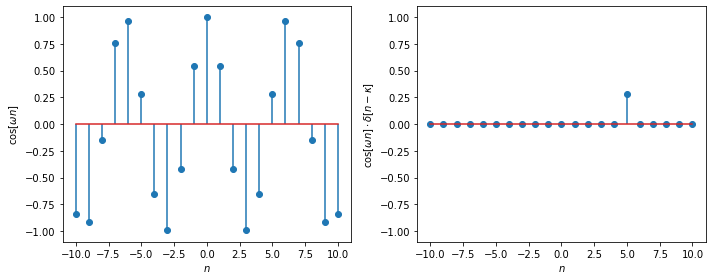

In [6]:
x = dirac(n - 5)
y = np.cos(n)
w = x*y

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(n, y, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$\cos[\omega n]$')
plt.ylim([-1.1, 1.1])

plt.subplot(122)
plt.stem(n, w, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$\cos[\omega n] \cdot \delta[n - \kappa]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

***
### Escalón discreto de Heaviside

La señal escalón discreto $\vcenter{{\large \ulcorner}}[n]$ se puede derivar del [escalón de Heaviside continuo](./03-Funciones_importantes.ipynb#escalon) como

\begin{equation}
\vcenter{{\large \ulcorner}}[n] = \begin{cases} 1 & n \geq 0 \\  0 & n < 0 \end{cases}
\end{equation}

Esta señal se puede utilizar para representar una señal que se "enciende" en un tiempo específico y se mantiene encendida en forma indefinida. Su relación con el impulso es:

\begin{equation}
\vcenter{{\large \ulcorner}}[n] = \sum_{\kappa = -\infty}^{n} \delta[\kappa] = \sum_{\kappa = 0}^{\infty} \delta[n-\kappa]
\end{equation}

El impulso discreto también se puede expresar en términos del escalón de Heaviside:

\begin{equation}
\delta[n] = \vcenter{{\large \ulcorner}}[n] - \vcenter{{\large \ulcorner}}[n-1]
\end{equation}

**Ejemplo**

En el siguiente ejemplo, definiremos una función para el escalón (step) $\vcenter{{\large \ulcorner}}[n]$ y la graficaremos.

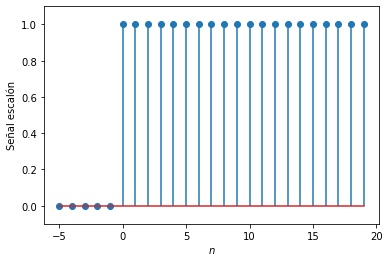

In [13]:
def step(n):
    return np.where(n >= 0, 1.0, 0.0)

n = np.arange(-5, 20)
f = step(n)

plt.stem(n, f, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('Señal escalón')
plt.ylim([-0.1, 1.1])
plt.show()

***
### Rect discreto

La señal discreta rectangular se define como 

\begin{equation}
\sqcap_N[n] = \begin{cases} 1 & \text{para } 0 \leq n < N \\ 0 & \text{otro caso}  \end{cases}
\end{equation}

donde $N \in \mathbb{N}$ denota el número de muestras distintas de cero. Es importante notar que la señal rectangular discreta no tiene simetría par como su [contraparte continua](./03-Funciones_importantes.ipynb#rect). Esta señal se utiliza para representar señales que son distintas de cero por un número límitado de muestras. Esta señal se relaciona con el escalón mediante la ecuación

\begin{equation}
\sqcap_N[n] = \vcenter{{\large \ulcorner}}[n] - \vcenter{{\large \ulcorner}}[n - N]
\end{equation}

**Ejemplo**

Definimos la función $\sqcap_{10}[n]$ y la graficamos:

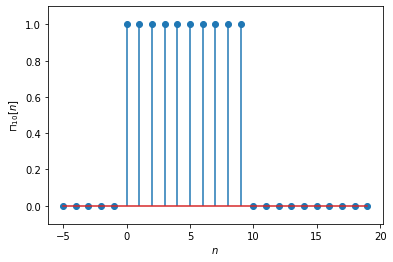

In [14]:
def rect(n, N):
    return np.where((0 <= n) & (n < N), 1.0, 0.0)


n = np.arange(-5, 20)
f = rect(n, 10)

plt.stem(n, f, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$\sqcap_{10}[n]$')
plt.ylim([-0.1, 1.1])
plt.show()

***
### Signo discreto

La señal signo discreta se puede construir a partir de su [contraparte continua](./03-Funciones_importantes.ipynb#signo) as

\begin{equation}
\text{sgn}[n] = \begin{cases} 1 & n>0 \\ 0 & n=0 \\ -1 & n < 0  \end{cases}
\end{equation}

Esta señal es útil para representar el valor absoluto de una señal $f[n]$ como

\begin{equation}
|f[n]| = f[n] \cdot \text{sgn}[f[n]]
\end{equation}

Se relaciona con el escalón mediante

\begin{equation}
\text{sgn}[n] = \vcenter{{\large \ulcorner}}[n] - \vcenter{{\large \ulcorner}}[-n]
\end{equation}

**Ejemplo**

Definimos la función $\text{sgn}[n]$ y la graficamos:

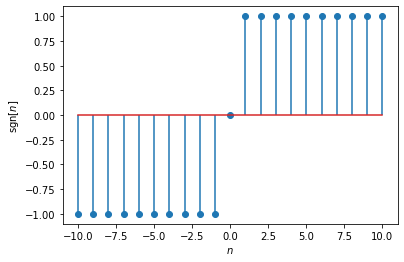

In [15]:
n = np.arange(-10, 11)
f = np.sign(n)

plt.stem(n, f, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$\mathrm{sgn}[n]$')
plt.ylim([-1.1, 1.1])
plt.show()

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>